In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import csv
df = pd.read_csv('/Users/filipporonzino/Downloads/datasetlabel.csv')

In [9]:
df.columns

Index(['permno', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi',
       'pe_inc', 'ps', 'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm',
       'roa', 'roe', 'roce', 'aftret_eq', 'aftret_invcapx', 'aftret_equity',
       'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap',
       'capital_ratio', 'cash_lt', 'debt_at', 'debt_ebitda', 'short_debt',
       'lt_debt', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets',
       'debt_capital', 'de_ratio', 'at_turn', 'rect_turn', 'pay_turn',
       'sale_invcap', 'sale_equity', 'rd_sale', 'adv_sale', 'staff_sale',
       'accrual', 'ptb', 'divyield', 'date', 'prc', 'vol', 'ret', 'retx',
       'mktcap', 'prc_adj', 'naics_processed', 'ret_industry_tot',
       'ret_industry_relative', 'MACD_index', 'rsi', 'stat_divyeld', 'target'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,retx,mktcap,prc_adj,naics_processed,ret_industry_tot,ret_industry_relative,MACD_index,rsi,stat_divyeld,target
985,10078,-77.244,0.359771,69.237,-26.063,-26.063,-24.529,-24.529,0.679451,32.069082,...,0.018779,6.116791,7.107231,33.0,0.367858,0.187231,0.131991,64.582393,0.0,-1.0
986,10078,-77.244,0.359771,69.237,-26.063,-26.063,-24.529,-24.529,0.677843,32.069082,...,-0.041475,6.137874,6.745006,33.0,-0.497445,-0.726844,0.154507,46.918255,0.0,-1.0
987,10078,-77.244,0.359771,69.237,-26.063,-26.063,-24.529,-24.529,0.676476,32.069082,...,0.004808,6.090311,7.106134,33.0,0.573959,-0.431592,0.166956,48.716550,0.0,-1.0
988,10078,-77.244,0.359771,69.237,-26.063,-26.063,-24.529,-24.529,0.675291,32.069082,...,-0.007177,6.105996,6.297823,33.0,0.041632,-0.254214,0.170147,46.018281,0.0,-1.0
989,10078,-77.244,0.359771,69.237,-26.063,-26.063,-24.529,-24.529,0.674249,32.069082,...,-0.012048,6.100701,6.565685,33.0,-0.281970,-0.074806,0.163791,41.588533,0.0,-1.0


In [12]:
# Use just the part of the dataset bewtween 2010 and 2012
# I have the date
df['Year'] = pd.to_datetime(df['date']).dt.year
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2012)]

In [13]:
df.head()  

,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,mktcap,prc_adj,naics_processed,ret_industry_tot,ret_industry_relative,MACD_index,rsi,stat_divyeld,target,Year
4795,10104,29.013,0.090318,7.361477,21.33,21.518,22.099,22.099,5.35,14.044,...,8.271152,6.997259,51.0,0.630492,0.001711,0.625508,67.517981,0.007330,1.0,2010
4796,10104,29.013,0.090318,7.361477,21.33,21.518,22.099,22.099,5.35,14.044,...,8.287082,6.592372,51.0,-0.007601,-0.050989,0.636078,66.308017,0.007850,1.0,2010
4797,10104,29.013,0.090318,7.361477,21.33,21.518,22.099,22.099,5.35,14.044,...,8.283162,7.053588,51.0,-0.586489,-0.117489,0.634516,53.125824,0.007824,1.0,2010
4798,10104,29.013,0.090318,7.361477,21.33,21.518,22.099,22.099,5.35,14.044,...,8.267549,6.924452,51.0,-0.344716,0.184659,0.622710,50.549086,0.007812,1.0,2010
4799,10104,29.013,0.090318,7.361477,21.33,21.518,22.099,22.099,5.35,14.044,...,8.267643,6.544365,51.0,0.161365,0.440445,0.608468,59.126978,0.007804,1.0,2010


[[18775 11127]
 [ 8119 38076]]
              precision    recall  f1-score   support

        -1.0       0.70      0.63      0.66     29902
         1.0       0.77      0.82      0.80     46195

    accuracy                           0.75     76097
   macro avg       0.74      0.73      0.73     76097
weighted avg       0.74      0.75      0.74     76097



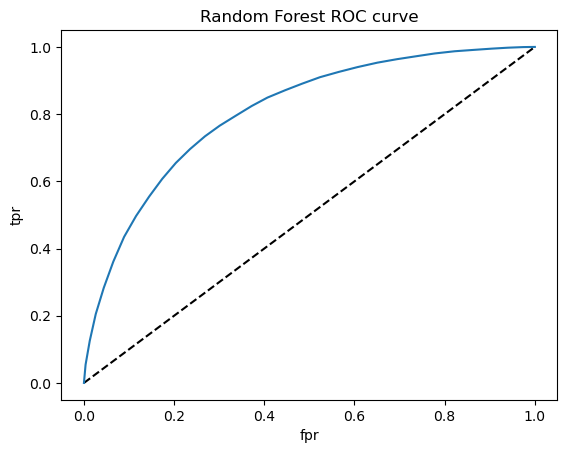

KeyboardInterrupt: 

In [14]:
# Selecting the features and the target
X = df[['MACD_index', 'rsi',  'mktcap', 'vol', 'ret_industry_tot']]
y = df['target']
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Random Forest Classifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
# ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()
# AUC
roc_auc_score(y_test, y_pred_proba)
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='train accuracy')
plt.plot(train_sizes, test_mean, label='test accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.show()




In [8]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [40, 60, 70],
    'max_features': [0.6, 0.7, 0.8]
}
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_
# Predicting the Test set results
y_pred = grid_search.predict(X_test)
# Check accuracy score
accuracy_score(y_test, y_pred)
# Confusion matrix
confusion_matrix(y_test, y_pred)
# Classification report
print(classification_report(y_test, y_pred))
# ROC AUC score
roc_auc_score(y_test, y_pred)


KeyboardInterrupt: 

In [33]:
# Split the dataset according to the years 2008-2010, 2010-2012, 2012-2014, 2014-2016, 2016-2018
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['year'].unique()
df_2008_2010 = df[(df['year'] >= 2008) & (df['year'] <= 2010)]
df_2010_2012 = df[(df['year'] >= 2010) & (df['year'] <= 2012)]
df_2012_2014 = df[(df['year'] >= 2012) & (df['year'] <= 2014)]
df_2014_2016 = df[(df['year'] >= 2014) & (df['year'] <= 2016)]
df_2016_2018 = df[(df['year'] >= 2016) & (df['year'] <= 2018)]
# Selecting the features and the target
X_2008_2010 = df_2008_2010[['CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi',
       'pe_inc', 'ps', 'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm',
       'roa', 'roe', 'roce', 'aftret_eq', 'aftret_invcapx', 'aftret_equity',
       'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap',
       'capital_ratio', 'cash_lt', 'debt_at', 'debt_ebitda', 'short_debt',
       'lt_debt', 'cash_debt', 'fcf_ocf', 'lt_ppent']]
y_2008_2010 = df_2008_2010['target']
X_2010_2012 = df_2010_2012[['MACD_index', 'rsi',  'mktcap', 'vol', 'ret_industry_tot']]
y_2010_2012 = df_2010_2012['target']
X_2012_2014 = df_2012_2014[['MACD_index', 'rsi',  'mktcap', 'vol', 'ret_industry_tot']]
y_2012_2014 = df_2012_2014['target']
X_2014_2016 = df_2014_2016[['MACD_index', 'rsi',  'mktcap', 'vol', 'ret_industry_tot']]
y_2014_2016 = df_2014_2016['target']
X_2016_2018 = df_2016_2018[['MACD_index', 'rsi',  'mktcap', 'vol', 'ret_industry_tot']]
y_2016_2018 = df_2016_2018['target']
# Splitting the dataset into the Training set and Test set
X_train_2008_2010, X_test_2008_2010, y_train_2008_2010, y_test_2008_2010 = train_test_split(X_2008_2010, y_2008_2010, test_size = 0.2, random_state = 42)
X_train_2010_2012, X_test_2010_2012, y_train_2010_2012, y_test_2010_2012 = train_test_split(X_2010_2012, y_2010_2012, test_size = 0.2, random_state = 42)
X_train_2012_2014, X_test_2012_2014, y_train_2012_2014, y_test_2012_2014 = train_test_split(X_2012_2014, y_2012_2014, test_size = 0.2, random_state = 42)
X_train_2014_2016, X_test_2014_2016, y_train_2014_2016, y_test_2014_2016 = train_test_split(X_2014_2016, y_2014_2016, test_size = 0.2, random_state = 42)
X_train_2016_2018, X_test_2016_2018, y_train_2016_2018, y_test_2016_2018 = train_test_split(X_2016_2018, y_2016_2018, test_size = 0.2, random_state = 42)
# Create Random Forest object
random_forest = RandomForestClassifier(n_estimators = 20, max_features = 3, random_state = 42, bootstrap=True)
# Train model
random_forest.fit(X_train_2008_2010, y_train_2008_2010)
# Predicting the Test set results
y_pred_2008_2010 = random_forest.predict(X_test_2008_2010)
# Check accuracy score
accuracy_score(y_test_2008_2010, y_pred_2008_2010)
# Confusion matrix
confusion_matrix(y_test_2008_2010, y_pred_2008_2010)
# Classification report
print(classification_report(y_test_2008_2010, y_pred_2008_2010))


              precision    recall  f1-score   support

        -1.0       0.87      0.87      0.87     35555
         1.0       0.88      0.88      0.88     39347

    accuracy                           0.88     74902
   macro avg       0.88      0.88      0.88     74902
weighted avg       0.88      0.88      0.88     74902

